In [1]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Dataset/Cipla DS Hiring Challenge/dfb5e5f2c9bc11eb.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')


finish


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
train=pd.read_csv("/content/dataset/train.csv")
test=pd.read_csv("/content/dataset/test.csv")
subm=pd.read_csv("/content/dataset/sample_submission.csv")

In [4]:
test_df=test

In [5]:
train.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [6]:
subm.head()

,Customer ID,Loan Sanction Amount (USD)
0,C-36995,54607.18
1,C-33999,37469.98
2,C-3770,36474.43
3,C-26480,56040.54
4,C-23459,74008.28


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [8]:
train.isna().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [9]:
test.isna().sum()

Customer ID                       0
Name                              0
Gender                           31
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
dtype: int64

In [10]:
# set target feature
targetFeature='Success_probability'

In [11]:
def datashape(df):
  rows,columns=df.shape
  print("The dataset contains ",rows,"rows and",columns,"columns.")

In [12]:
# segregate numerical and categorical features
def divideFeatures(df):
    numerical_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [13]:
datashape(train)

The dataset contains  30000 rows and 24 columns.


In [14]:
# remove ID from training data
train.drop(['Customer ID'], inplace=True, axis=1)

In [15]:
# check for duplicates
print(train.shape)
train.drop_duplicates(inplace=True)
print(train.shape)

(30000, 23)
(30000, 23)


In [16]:
continuous_data, categorical_data = divideFeatures(train)

In [17]:
categorical_data[:3]

,Name,Gender,Income Stability,Profession,Type of Employment,Location,Expense Type 1,Expense Type 2,Has Active Credit Card,Property Location
0,Frederica Shealy,F,Low,Working,Sales staff,Semi-Urban,N,N,NaN,Rural
1,America Calderone,M,Low,Working,NaN,Semi-Urban,N,Y,Unpossessed,Rural
2,Rosetta Verne,F,High,Pensioner,NaN,Semi-Urban,N,Y,Unpossessed,Urban


In [18]:
for col in categorical_data:
    print(f'{col} : {categorical_data[col].unique()}')

Name : ['Frederica Shealy' 'America Calderone' 'Rosetta Verne' ... 'Carmelo Lone'
 'Carolann Osby' 'Bridget Garibaldi']
Gender : ['F' 'M' nan]
Income Stability : ['Low' 'High' nan]
Profession : ['Working' 'Pensioner' 'State servant' 'Commercial associate' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Type of Employment : ['Sales staff' nan 'High skill tech staff' 'Secretaries' 'Laborers'
 'Managers' 'Cooking staff' 'Core staff' 'Drivers' 'Realty agents'
 'Security staff' 'Accountants' 'Private service staff'
 'Waiters/barmen staff' 'Medicine staff' 'Cleaning staff'
 'Low-skill Laborers' 'HR staff' 'IT staff']
Location : ['Semi-Urban' 'Rural' 'Urban']
Expense Type 1 : ['N' 'Y']
Expense Type 2 : ['N' 'Y']
Has Active Credit Card : [nan 'Unpossessed' 'Active' 'Inactive']
Property Location : ['Rural' 'Urban' 'Semi-Urban' nan]


In [19]:
for col in continuous_data:
    print(f'{col} : {continuous_data[col].unique()}')

Age : [56 32 65 31 60 43 45 38 18 39 48 61 54 64 41 19 44 24 55 63 23 29 28 49
 30 37 51 27 59 62 21 33 58 25 26 50 46 22 36 53 34 40 35 42 57 47 52 20]
Income (USD) : [1933.05 4952.91  988.19 ... 1606.88 2417.71 3068.24]
Loan Amount Request (USD) : [ 72809.58  46837.47  45593.04 ...  81410.08 142524.1  156290.54]
Current Loan Expenses (USD) : [241.08 495.81 171.95 ... 583.11 378.29 693.94]
Dependents : [ 3.  1.  2. nan  4.  5.  8.  6.  7. 10. 14.]
Credit Score : [809.44 780.4  833.15 ... 709.43 869.61 815.44]
No. of Defaults : [0 1]
Property ID : [746 608 546 890 715 491 227 314 241 883 325 196 678 578 500 458 395  68
 739 499 413 908  89 640 694 566 479 344 424 514 581 854 147 681 164 157
  43 245 740 530 575 467 217 421 270 279 563 956 852 400 415 161 816 250
 457 191 783 953 942  94 113 918 121 107 917 743 459 758 568 305 483 384
 986 609 502 990 477 692 915 600   7 137 992 870 673 210  27 858 835 675
 436 434 662 604 184 460   1 993 521 838 955 356 414 839 817 945 274 211
 476 347

In [20]:
train[train['Co-Applicant']==-999]

,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
62,Pam Messmer,M,51,1993.49,NaN,Working,Private service staff,Rural,97298.45,275.74,Y,Y,2.0,801.23,0,Active,94,1993.49,1,Urban,-999,157137.04,68108.91
98,Mendy Mcclean,M,18,1532.00,Low,Working,NaN,Semi-Urban,33819.92,170.24,Y,Y,4.0,682.04,0,Unpossessed,184,1532.00,4,Rural,-999,49033.50,21982.95
150,Yolonda Seeber,M,36,2142.63,Low,Working,Core staff,Semi-Urban,47814.96,261.43,N,Y,1.0,847.83,1,Inactive,762,2142.63,1,Rural,-999,83481.60,35861.22
812,Sparkle Reich,F,29,5213.26,Low,Commercial associate,Managers,Semi-Urban,91111.32,500.92,N,Y,3.0,707.24,0,Inactive,378,5213.26,2,Rural,-999,131613.08,63777.92
1077,Lizette Griffiths,F,50,NaN,NaN,Working,Managers,Semi-Urban,101100.43,728.76,N,Y,NaN,789.29,0,Unpossessed,427,NaN,4,Semi-Urban,-999,183182.50,70770.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29312,Danica Andrzejewski,F,20,4489.91,Low,Commercial associate,High skill tech staff,Urban,351190.52,917.72,N,N,3.0,715.87,1,NaN,311,4489.91,4,Semi-Urban,-999,409300.71,245833.36
29531,Nannie Augusta,M,61,3705.62,Low,Commercial associate,NaN,Semi-Urban,43979.64,228.39,N,Y,2.0,697.78,0,Inactive,155,3705.62,4,Semi-Urban,-999,50269.41,30785.75
29611,Nikki Resto,F,41,4130.76,Low,Commercial associate,Laborers,Semi-Urban,220174.62,652.18,Y,Y,1.0,789.50,0,Active,645,4130.76,2,Rural,-999,307019.64,165130.96
29821,Lizette Pfarr,F,61,3509.29,Low,Working,Sales staff,Semi-Urban,70909.68,355.09,N,N,2.0,718.31,1,Active,189,3509.29,3,Urban,-999,-999.00,46091.29


In [21]:
train['Name'].count()

30000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


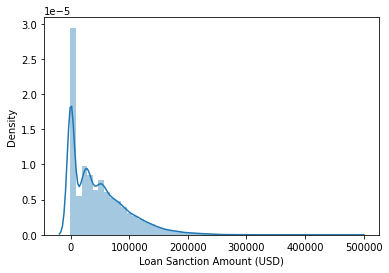

In [22]:
sns.distplot(train['Loan Sanction Amount (USD)'])
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


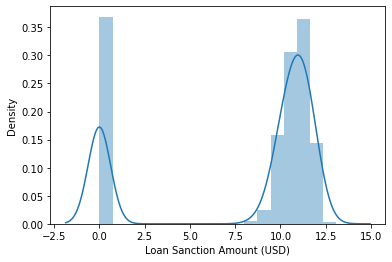

In [23]:
sns.distplot(np.log1p(train['Loan Sanction Amount (USD)']))
plt.show()

In [24]:
#remove all columns having no values
train.dropna(axis=1, how="all", inplace=True)
train.dropna(axis=0, how="all", inplace=True)
datashape(train)

The dataset contains  30000 rows and 23 columns.


In [25]:
def fillNanValues(df, col, value):
    df[col].fillna(value, inplace=True)

In [26]:
train['Gender'].unique()

array(['F', 'M', nan], dtype=object)

In [27]:
fillNanValues(train, 'Gender', train['Gender'].mode()[0])
fillNanValues(test, 'Gender', test['Gender'].mode()[0])
print(train['Gender'].isna().any())#any returns boolean values
print(test['Gender'].isna().any())

False
False


In [28]:
train['Income Stability'].unique()

array(['Low', 'High', nan], dtype=object)

In [29]:
fillNanValues(train, 'Income Stability', train['Income Stability'].mode()[0])
fillNanValues(test, 'Income Stability', test['Income Stability'].mode()[0])
print(train['Income Stability'].isna().any())#any returns boolean values
print(test['Income Stability'].isna().any())

False
False


In [30]:
train['Type of Employment'].unique()

array(['Sales staff', nan, 'High skill tech staff', 'Secretaries',
       'Laborers', 'Managers', 'Cooking staff', 'Core staff', 'Drivers',
       'Realty agents', 'Security staff', 'Accountants',
       'Private service staff', 'Waiters/barmen staff', 'Medicine staff',
       'Cleaning staff', 'Low-skill Laborers', 'HR staff', 'IT staff'],
      dtype=object)

In [31]:
fillNanValues(train, 'Type of Employment', train['Type of Employment'].mode()[0])
fillNanValues(test, 'Type of Employment', test['Type of Employment'].mode()[0])
print(train['Type of Employment'].isna().any())#any returns boolean values
print(test['Type of Employment'].isna().any())

False
False


In [32]:
train['Has Active Credit Card'].unique()

array([nan, 'Unpossessed', 'Active', 'Inactive'], dtype=object)

In [33]:
fillNanValues(train, 'Has Active Credit Card', train['Has Active Credit Card'].mode()[0])
fillNanValues(test, 'Has Active Credit Card', test['Has Active Credit Card'].mode()[0])
print(train['Has Active Credit Card'].isna().any())#any returns boolean values
print(test['Has Active Credit Card'].isna().any())

False
False


In [34]:
train['Property Location'].unique()

array(['Rural', 'Urban', 'Semi-Urban', nan], dtype=object)

In [35]:
fillNanValues(train, 'Property Location', train['Property Location'].mode()[0])
fillNanValues(test, 'Property Location', test['Property Location'].mode()[0])
print(train['Property Location'].isna().any())#any returns boolean values
print(test['Property Location'].isna().any())

False
False


In [36]:
train.isna().sum()

Name                              0
Gender                            0
Age                               0
Income (USD)                   4576
Income Stability                  0
Profession                        0
Type of Employment                0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card            0
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location                 0
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [37]:
train['Income (USD)'].unique()

array([1933.05, 4952.91,  988.19, ..., 1606.88, 2417.71, 3068.24])

In [38]:
fillNanValues(train, 'Income (USD)', train['Income (USD)'].mean())
fillNanValues(test, 'Income (USD)', test['Income (USD)'].mean())
print(train['Income (USD)'].isna().any())#any returns boolean values
print(test['Income (USD)'].isna().any())

False
False


In [39]:
train['Current Loan Expenses (USD)'].unique()

array([241.08, 495.81, 171.95, ..., 583.11, 378.29, 693.94])

In [40]:
fillNanValues(train, 'Current Loan Expenses (USD)', train['Current Loan Expenses (USD)'].mean())
fillNanValues(test, 'Current Loan Expenses (USD)', test['Current Loan Expenses (USD)'].mean())
print(train['Current Loan Expenses (USD)'].isna().any())#any returns boolean values
print(test['Current Loan Expenses (USD)'].isna().any())

False
False


In [41]:
train['Dependents'].unique()

array([ 3.,  1.,  2., nan,  4.,  5.,  8.,  6.,  7., 10., 14.])

In [42]:
fillNanValues(train, 'Dependents', train['Dependents'].mean())
fillNanValues(test, 'Dependents', test['Dependents'].mean())
print(train['Dependents'].isna().any())#any returns boolean values
print(test['Dependents'].isna().any())

False
False


In [43]:
train['Credit Score'].unique()

array([809.44, 780.4 , 833.15, ..., 709.43, 869.61, 815.44])

In [44]:
fillNanValues(train, 'Credit Score', train['Credit Score'].mean())
fillNanValues(test, 'Credit Score', test['Credit Score'].mean())
print(train['Credit Score'].isna().any())#any returns boolean values
print(test['Credit Score'].isna().any())

False
False


In [45]:
train['Property Age'].unique()

array([1933.05, 4952.91,  988.19, ..., 1606.88, 2417.71, 3068.24])

In [46]:
fillNanValues(train, 'Property Age', train['Property Age'].mean())
fillNanValues(test, 'Property Age', test['Property Age'].mean())
print(train['Property Age'].isna().any())#any returns boolean values
print(test['Property Age'].isna().any())

False
False


In [47]:
train['Loan Sanction Amount (USD)'].unique()

array([ 54607.18,  37469.98,  36474.43, ...,  61057.56,  99766.87,
       117217.9 ])

In [48]:
fillNanValues(train, 'Loan Sanction Amount (USD)', train['Loan Sanction Amount (USD)'].mean())
#fillNanValues(test, 'Loan Sanction Amount (USD)', test['Loan Sanction Amount (USD)'].mean())
print(train['Loan Sanction Amount (USD)'].isna().any())#any returns boolean values
#print(test['Loan Sanction Amount (USD)'].isna().any())

False


In [49]:
# setting missing values to most occurring values
train['Co-Applicant'] = train['Co-Applicant'].apply(lambda x:0 if x == -999 else x)
test['Co-Applicant'] = test['Co-Applicant'].apply(lambda x:0 if x == -999 else x)
train['Co-Applicant'].unique()

array([1, 0])

In [50]:
train.isna().sum()

Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [51]:
test.isna().sum()

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
dtype: int64

In [52]:
categorical_data.columns

Index(['Name', 'Gender', 'Income Stability', 'Profession',
       'Type of Employment', 'Location', 'Expense Type 1', 'Expense Type 2',
       'Has Active Credit Card', 'Property Location'],
      dtype='object')

In [53]:
continuous_data.columns

Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Property ID', 'Property Age', 'Property Type',
       'Co-Applicant', 'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [54]:
# train['Loan Sanction Amount (USD)'] = train['Loan Sanction Amount (USD)'].abs()

In [55]:
# train['Loan Sanction Amount (USD)'] = np.log1p(train['Loan Sanction Amount (USD)'])

In [56]:
train.head()

,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,Frederica Shealy,F,56,1933.050000,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.000000,809.44,0,Active,746,1933.05000,4,Rural,1,119933.46,54607.18
1,America Calderone,M,32,4952.910000,Low,Working,Laborers,Semi-Urban,46837.47,495.81,N,Y,1.000000,780.40,0,Unpossessed,608,4952.91000,2,Rural,1,54791.00,37469.98
2,Rosetta Verne,F,65,988.190000,High,Pensioner,Laborers,Semi-Urban,45593.04,171.95,N,Y,1.000000,833.15,0,Unpossessed,546,988.19000,2,Urban,0,72440.58,36474.43
3,Zoe Chitty,F,65,2630.574417,High,Pensioner,Laborers,Rural,80057.92,298.54,N,Y,2.000000,832.70,1,Unpossessed,890,2631.11944,2,Semi-Urban,1,121441.51,56040.54
4,Afton Venema,F,31,2614.770000,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,2.253027,745.55,1,Active,715,2614.77000,4,Semi-Urban,1,208567.91,74008.28


In [57]:
train.drop('Name',axis=1,inplace=True)

In [58]:
test.drop('Name',axis=1,inplace=True)

In [59]:
continuous_data, categorical_data = divideFeatures(train)

In [60]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
label_columns=categorical_data.columns

for label_column in label_columns:
    train[label_column] = le.fit_transform(train[label_column])

In [61]:
continuous_data, categorical_data = divideFeatures(test)

In [62]:
categorical_data[:3]

,Customer ID,Gender,Income Stability,Profession,Type of Employment,Location,Expense Type 1,Expense Type 2,Has Active Credit Card,Property Location,Co-Applicant,Property Price
0,C-26247,F,Low,Commercial associate,Managers,Semi-Urban,N,N,Unpossessed,Urban,1,236644.5
1,C-35067,F,Low,Working,Sales staff,Rural,Y,Y,Unpossessed,Rural,1,142357.3
2,C-34590,F,Low,Working,Laborers,Semi-Urban,N,Y,Unpossessed,Urban,1,300991.24


In [63]:
label_columns=categorical_data.columns

for label_column in label_columns:
    test[label_column] = le.fit_transform(test[label_column])

In [64]:
test.head()

,Customer ID,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,7177,0,47,3472.69,1,0,10,1,137088.98,396.72,0,0,2.000000,799.140000,0,2,843,3472.69,2,2,1,8784
1,11050,0,57,1184.84,1,6,14,0,104771.59,463.76,1,1,2.000000,833.310000,0,2,22,1184.84,1,0,1,3774
2,10839,0,52,1266.27,1,6,8,1,176684.91,493.15,0,1,3.000000,627.440000,0,2,1,1266.27,1,2,1,10652
3,2967,1,65,1369.72,0,2,8,0,97009.18,446.15,0,1,2.000000,833.200000,0,1,730,1369.72,1,1,0,2432
4,993,0,60,1939.23,0,2,8,2,109980.00,370.10,0,0,2.251246,738.821538,0,0,356,1939.23,4,1,1,6266


In [65]:
test.drop('Customer ID',axis=1,inplace=True)

In [66]:
train.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,0,56,1933.050000,1,7,14,1,72809.58,241.08,0,0,3.000000,809.44,0,0,746,1933.05000,4,0,1,119933.46,54607.18
1,1,32,4952.910000,1,7,8,1,46837.47,495.81,0,1,1.000000,780.40,0,2,608,4952.91000,2,0,1,54791.00,37469.98
2,0,65,988.190000,0,3,8,1,45593.04,171.95,0,1,1.000000,833.15,0,2,546,988.19000,2,2,0,72440.58,36474.43
3,0,65,2630.574417,0,3,8,0,80057.92,298.54,0,1,2.000000,832.70,1,2,890,2631.11944,2,1,1,121441.51,56040.54
4,0,31,2614.770000,1,7,6,1,113858.89,491.41,0,1,2.253027,745.55,1,0,715,2614.77000,4,1,1,208567.91,74008.28


In [67]:
X=train.drop(['Loan Sanction Amount (USD)'], axis=1)
y=train['Loan Sanction Amount (USD)']

In [68]:
!pip install catboost

     |████████████████████████████████| 69.2MB 51kB/s 


In [69]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import KFold
#from sklearn.linear_model import LassoCV , RidgeCV, ElasticNet, Lasso,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
import lightgbm as lgb 
from xgboost import XGBRegressor  
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import datetime
import xgboost as xgb
from mlxtend.regressor import StackingCVRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [70]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LassoCV, ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
#from category_encoders import MEstimateEncoder
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVR
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import mean_squared_log_error

In [71]:
# Stacking regressor function to ensemble LGBM and CatBoost
def get_stacking():
    level0 = [#('lgbm_regressor', lgb.LGBMRegressor(n_estimators=3000, max_depth=11, learning_rate=0.06, num_leaves=40)),
              #('gradient_regressor',GradientBoostingRegressor(n_estimators=1000, learning_rate=0.03)),
               ('XGB_regressor', xgb.XGBRegressor(n_estimators=700, objective='reg:squarederror', max_depth=7, learning_rate=0.06, colsample_bytree=0.9, subsample=0.8))]
               #('catboost', CatBoostRegressor(silent=True,learning_rate=0.18, n_estimators=2000, depth=6))]
    
    level1 = ExtraTreesRegressor()
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [72]:
# K-Fold Cross Validation 
kf = KFold(n_splits=10, shuffle=True)
scores = []
for fold, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    X_train = X.iloc[train_index]
    #X_train = ordinal_enc(X_train, cat_feature)
    #for col in cat_feature:
      #X_train[col] = le.fit_transform(X_train[col])
    
   # y_train = np.log(y.iloc[train_index])
    y_train = y.iloc[train_index]

    
    X_test = X.iloc[test_index]
    #X_test = label_enc(X_test, cat_feature, testing=True)
    #for col in cat_feature:
      #X_test[col] = le.fit_transform(X_test[col])

    y_test = y.iloc[test_index]
    
    #model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.03)
    #model = RandomForestRegressor(n_estimators=200, n_jobs=-1)
    #model = ElasticNet()
    model = lgb.LGBMRegressor(n_estimators=2500, max_depth=11, learning_rate=0.05, num_leaves=40)
    #model = xgb.XGBRegressor(n_estimators=590, objective='reg:squarederror', max_depth=7, learning_rate=0.06, min_child_weight=1.2)
    #model = get_stacking()
    #model = ExtraTreesRegressor(n_estimators=500, bootstrap=True, n_jobs=-1)
    #model = LinearRegression()
    #model = KNeighborsRegressor(weights='distance', n_neighbors=15)
    #model = CatBoostRegressor(silent=True,learning_rate=0.18, n_estimators=1700, depth=6)
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
 
    score = np.sqrt(mean_squared_error(y_test,pred))#np.expm1
    print(f'RMSLE score for fold {fold} is {score}')
    scores.append(score)

print(f'Mean RMSLE score is {np.mean(scores)}')

RMSLE score for fold 1 is 24125.61745537552
RMSLE score for fold 2 is 23835.265260672633
RMSLE score for fold 3 is 23840.38237061673
RMSLE score for fold 4 is 26136.29188011964
RMSLE score for fold 5 is 23941.164963171177
RMSLE score for fold 6 is 25080.608231010276
RMSLE score for fold 7 is 24965.659193711108
RMSLE score for fold 8 is 24766.39166194449
RMSLE score for fold 9 is 24968.249485907476
RMSLE score for fold 10 is 25768.035282844612
Mean RMSLE score is 24742.76657853737


In [75]:
qw=model.predict(test)

In [76]:
qw[5]

0.0

In [73]:
# Stack Model 
model = get_stacking()

In [74]:
model.fit(X, y)

StackingRegressor(cv=5,
                  estimators=[('XGB_regressor',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.9, gamma=0,
                                            importance_type='gain',
                                            learning_rate=0.06,
                                            max_delta_step=0, max_depth=7,
                                            min_child_weight=1, missing=None,
                                            n_estimators=700, n_jobs=1,
                                            nthread=None,
                                            objective='reg:squarederror',
                                            random_state=0...
                                                      ccp_alpha=0.0,
                          

In [ ]:
lightgbm=LGBMRegressor(objective='regression',num_leaves=80,
                              learning_rate=0.05, n_estimators=1200,
                              max_bin = 30 , max_features='auto', random_state=10)

In [ ]:
xgb=XGBRegressor(learning_rate =0.1, 
      n_estimators=1500, max_depth=12, min_child_weight=1,gamma=0, reg_alpha=2e-5,
      subsample=0.8,colsample_bytree=0.8,
      nthread=4,scale_pos_weight=1,seed=27,verbose=True,random_state=10)

In [ ]:
grb=GradientBoostingRegressor(learning_rate=0.1,n_estimators=400, max_depth=12
                              ,subsample=0.8,
                              verbose=False,random_state=10)


In [ ]:
rf=RandomForestRegressor(n_estimators=3000, oob_score = False, n_jobs = -1,random_state =50,
                         max_features = "auto", min_samples_leaf = 2,warm_start=True,criterion='mse',max_depth=50)

In [ ]:
# Final ensemble that uses outputs from each model regressor and the original data in the meta regressor XGB
avg=StackingCVRegressor(regressors=(lightgbm,grb),meta_regressor=xgb, use_features_in_secondary=True)#,svr,krr,

In [ ]:
# Function to calculate RMSE error of the complete model for reference, similiar to rmsle_cv without KFOLD CV
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
X=np.array(X)
Y=np.array(y)

In [ ]:
# Fitting the model on the train data and predicting the train price values
xgb.fit(X,Y)
y_pred=xgb.predict(X)

[05:03:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# RMSE value of the model on training data
rmsle(y,y_pred)

16.2806083617486

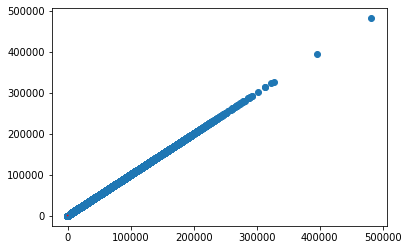

In [ ]:
# Plot of the model prediction with the original price values in the training data set to undestand model fit
plt.scatter(list(y_pred),y)
plt.plot(range(7,13),range(7,13),'r')

In [ ]:
get = rf.predict(test)


In [ ]:
Pred=np.exp(get)

In [79]:
submmitted_data = pd.DataFrame()

In [80]:
submmitted_data['Customer ID'] = test['Customer ID']
submmitted_data['Loan Sanction Amount (USD)'] = qw
#submmitted_data['Loan Sanction Amount (USD)'] =submmitted_data['Loan Sanction Amount (USD)'].abs()

In [81]:
submmitted_data.head()

,Customer ID,Loan Sanction Amount (USD)
0,C-26247,97335.838100
1,C-35067,68004.936000
2,C-34590,0.000000
3,C-16668,59903.416331
4,C-12196,81929.958500


In [82]:
submmitted_data.to_csv('output_7.csv',index=False)

In [83]:
q=pd.read_csv('output_7.csv')
q.head()

,Customer ID,Loan Sanction Amount (USD)
0,C-26247,97335.838100
1,C-35067,68004.936000
2,C-34590,0.000000
3,C-16668,59903.416331
4,C-12196,81929.958500


**Neural Network**

In [67]:
train_stats=train.describe()
train_stats.pop('Loan Sanction Amount (USD)')
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Gender,30000.0,0.503533,0.499996,0.00,0.0000,1.000000,1.0000,1.00
Age,30000.0,40.092300,16.045129,18.00,25.0000,40.000000,55.0000,65.00
Income (USD),30000.0,2630.574417,10368.201879,377.70,1743.3050,2473.470000,2869.1425,1777460.21
Income Stability,30000.0,0.914467,0.279678,0.00,1.0000,1.000000,1.0000,1.00
Profession,30000.0,4.804900,2.628992,0.00,1.0000,7.000000,7.0000,7.00
Type of Employment,30000.0,7.892067,3.892110,0.00,6.0000,8.000000,10.0000,17.00
Location,30000.0,0.925367,0.525045,0.00,1.0000,1.000000,1.0000,2.00
Loan Amount Request (USD),30000.0,88826.333855,59536.949605,6048.24,41177.7550,75128.075000,119964.6050,621497.82
Current Loan Expenses (USD),30000.0,400.936876,241.849055,-999.00,248.6550,376.505000,520.1025,3840.88
Expense Type 1,30000.0,0.359533,0.479872,0.00,0.0000,0.000000,1.0000,1.00


In [68]:
x_train=train.drop(['Loan Sanction Amount (USD)'],axis=1)
y_train=train['Loan Sanction Amount (USD)']

In [69]:
def norm(x):
  return( (x-train_stats['mean']) / train_stats['std'] )

norm_x_train=norm(x_train)
norm_test=norm(test)

In [70]:
norm_x_train[:2]

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,-1.007075,0.991435,-0.067275,0.305827,0.834959,1.569311,0.142147,-0.269022,-0.660978,-0.749228,-1.43350,0.820144,0.992424,-0.490494,-1.126670,0.846984,-0.067335,1.376708,-1.21452,0.419198,-0.126417
1,0.992942,-0.504346,0.223986,0.305827,0.834959,0.027731,0.142147,-0.705257,0.392282,-0.749228,0.69757,-1.375769,0.578073,-0.490494,1.299755,0.368080,0.223958,-0.411302,-1.21452,0.419198,-0.822758


In [71]:
norm_test[:2]

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,-1.007075,0.430517,0.081221,0.305827,-1.827659,0.541591,0.142147,0.810634,-0.017436,-0.749228,-1.43350,-0.277812,0.845461,-0.490494,1.299755,1.183605,0.081177,-0.411302,1.283207,0.419198,-1.314551
1,-1.007075,1.053759,-0.139439,0.305827,0.454585,1.569311,-1.762452,0.267821,0.259762,1.334662,0.69757,-0.277812,1.333007,-0.490494,1.299755,-1.665526,-0.139507,-1.305307,-1.214520,0.419198,-1.368106


In [72]:
input_shape=[norm_x_train.shape[1]]

In [73]:
input_shape

[21]

In [74]:
from tensorflow import keras
from tensorflow.keras import layers

In [75]:
model=keras.Sequential([
   layers.Dense(150,activation='relu',input_shape=input_shape,kernel_regularizer=keras.regularizers.l2(1)),
   layers.Dropout(rate=0.2),
   layers.Dense(150,activation='relu',kernel_regularizer=keras.regularizers.l2(1)),
   layers.Dropout(rate=0.2),
   layers.Dense(150,activation='relu',kernel_regularizer=keras.regularizers.l2(1)),
   layers.Dropout(rate=0.2),
   layers.Dense(150,activation='relu',kernel_regularizer=keras.regularizers.l2(1)),
   layers.Dropout(rate=0.2),

   #layers.Dense(50,activation='relu',activity_regularizer=keras.regularizers.l2(1e-2)),
   #layers.Dropout(rate=0.2),
   #layers.Dense(50,activation='relu',activity_regularizer=keras.regularizers.l2(1e-2)),
   #layers.Dropout(rate=0.2),
   #layers.Dense(50,activation='relu',activity_regularizer=keras.regularizers.l2(1e-2)),
   #layers.Dropout(rate=0.2),
   #layers.Dense(36,activation='relu',activity_regularizer=keras.regularizers.l2(1e-2)),
   #layers.Dropout(rate=0.3),

   layers.Dense(1)
])

In [76]:
optimizer=keras.optimizers.RMSprop(0.01)
metric1=keras.metrics.RootMeanSquaredError()
metric2=keras.metrics.MeanAbsoluteError()
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=[metric1]
)

In [77]:
early_stopping=keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=0
)

In [78]:
history=model.fit(
    norm_x_train,y_train,
    validation_split=0.80,
    epochs=200,
    batch_size=512,
    callbacks=[early_stopping]
)

Epoch 1/200
12/12 [==============================] - 1s 45ms/step - loss: 47966.0938 - root_mean_squared_error: 67546.3984 - val_loss: 48083.4805 - val_root_mean_squared_error: 67608.9453
Epoch 2/200
12/12 [==============================] - 0s 26ms/step - loss: 47864.3438 - root_mean_squared_error: 67546.2344 - val_loss: 47993.2812 - val_root_mean_squared_error: 67608.8203
Epoch 3/200
12/12 [==============================] - 0s 28ms/step - loss: 47782.9219 - root_mean_squared_error: 67546.1250 - val_loss: 47922.1836 - val_root_mean_squared_error: 67608.6875
Epoch 4/200
12/12 [==============================] - 0s 26ms/step - loss: 47719.2812 - root_mean_squared_error: 67545.9766 - val_loss: 47867.1562 - val_root_mean_squared_error: 67608.5078
Epoch 5/200
12/12 [==============================] - 0s 26ms/step - loss: 47670.3203 - root_mean_squared_error: 67545.7891 - val_loss: 47825.1094 - val_root_mean_squared_error: 67608.2969
Epoch 6/200
12/12 [==============================] - 0s 27ms

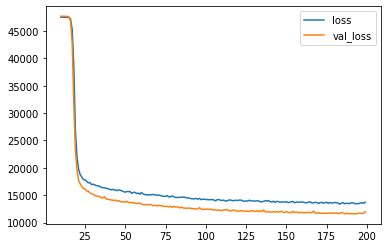

In [79]:
history_df=pd.DataFrame(history.history)
history_df.loc[10:,['loss','val_loss']].plot()

In [80]:
nn=model.predict(norm_test)

In [81]:
submmitted_data = pd.DataFrame()

In [83]:
submmitted_data['Customer ID'] = test['Customer ID']
submmitted_data['Loan Sanction Amount (USD)'] = nn


In [84]:
submmitted_data.head()

,Customer ID,Loan Sanction Amount (USD)
0,C-26247,93285.640625
1,C-35067,75005.648438
2,C-34590,37695.496094
3,C-16668,61164.066406
4,C-12196,69476.078125


In [85]:
submmitted_data.to_csv('output_9.csv',index=False)